In [1]:
#!pip install C:\Users\Admin\Downloads\LIBRARIES\netcdf\cftime-1.6.2-cp39-cp39-win_amd64.whl
#!pip install C:\Users\Admin\Downloads\LIBRARIES\netcdf\numpy-1.24.1-cp39-cp39-win_amd64.whl
#!pip install C:\Users\Admin\Downloads\LIBRARIES\netcdf\netCDF4-1.6.2-cp39-cp39-win_amd64.whl

In [1]:
import netCDF4 

In [2]:
import xarray as xr 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Preprocessing

In [3]:
# Load NOAA dataset 
noaa_ds = xr.open_dataset("noaa_sst.day.mean.2019.nc")                   #jan 2019
print(noaa_ds.info())

xarray.Dataset {
dimensions:
	time = 365 ;
	lat = 720 ;
	lon = 1440 ;

variables:
	datetime64[ns] time(time) ;
		time:long_name = Time ;
		time:delta_t = 0000-00-01 00:00:00 ;
		time:avg_period = 0000-00-01 00:00:00 ;
		time:axis = T ;
		time:actual_range = [79988. 80352.] ;
	float32 lat(lat) ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
		lat:actual_range = [-89.875  89.875] ;
		lat:axis = Y ;
	float32 lon(lon) ;
		lon:long_name = Longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
		lon:actual_range = [1.25000e-01 3.59875e+02] ;
		lon:axis = X ;
	float32 sst(time, lat, lon) ;
		sst:long_name = Daily Sea Surface Temperature ;
		sst:units = degC ;
		sst:valid_range = [-3. 45.] ;
		sst:precision = 2.0 ;
		sst:dataset = NOAA High-resolution Blended Analysis ;
		sst:var_desc = Sea Surface Temperature ;
		sst:level_desc = Surface ;
		sst:statistic = Mean ;
		sst:parent_stat = Individual Observations ;
		sst:actual_range

In [4]:
# Load ECMWF dataset
# Use a wildcard to match all NetCDF files in the folder and combine all nc file into one dataset
ecmwf_ds = xr.open_mfdataset(r"C:\Users\Admin\DESKTOP\RIYA PROJECT\ecmwf/*.nc", combine="by_coords") 

#drop bounds because not needed
ecmwf_ds = ecmwf_ds.drop("lat_bnds") 
ecmwf_ds = ecmwf_ds.drop("lon_bnds")
ecmwf_ds = ecmwf_ds.drop("time_bnds")
print(ecmwf_ds.info())

xarray.Dataset {
dimensions:
	lat = 3600 ;
	lon = 7200 ;
	time = 31 ;

variables:
	float32 lat(lat) ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
		lat:valid_min = -90.0 ;
		lat:valid_max = 90.0 ;
		lat:reference_datum = geographical coordinates, WGS84 projection ;
		lat:axis = Y ;
		lat:bounds = lat_bnds ;
	float32 lon(lon) ;
		lon:long_name = Longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
		lon:valid_min = -180.0 ;
		lon:valid_max = 180.0 ;
		lon:reference_datum = geographical coordinates, WGS84 projection ;
		lon:axis = X ;
		lon:bounds = lon_bnds ;
	datetime64[ns] time(time) ;
		time:long_name = reference time of sst file ;
		time:standard_name = time ;
		time:axis = T ;
		time:bounds = time_bnds ;
	float32 sea_surface_temperature(time, lat, lon) ;
		sea_surface_temperature:long_name = sea surface skin temperature ;
		sea_surface_temperature:standard_name = sea_surface_skin_temperature ;
		sea_surface_tempe

In [5]:
# Load NASA dataset 
nasa_ds = xr.open_dataset(r"C:\Users\Admin\Desktop\RIYA PROJECT\earthdata_jan_2019.nc") 
print(nasa_ds.info())

xarray.Dataset {
dimensions:
	time = 1 ;
	lat = 17999 ;
	lon = 36000 ;

variables:
	datetime64[ns] time(time) ;
		time:long_name = reference time of sst field ;
		time:standard_name = time ;
		time:axis = T ;
		time:comment = Nominal time of analyzed fields ;
	float32 lat(lat) ;
		lat:long_name = latitude ;
		lat:standard_name = latitude ;
		lat:axis = Y ;
		lat:units = degrees_north ;
		lat:valid_min = -90.0 ;
		lat:valid_max = 90.0 ;
		lat:comment = none ;
	float32 lon(lon) ;
		lon:long_name = longitude ;
		lon:standard_name = longitude ;
		lon:axis = X ;
		lon:units = degrees_east ;
		lon:valid_min = -180.0 ;
		lon:valid_max = 180.0 ;
		lon:comment = none ;
	float32 analysed_sst(time, lat, lon) ;
		analysed_sst:long_name = analysed sea surface temperature ;
		analysed_sst:standard_name = sea_surface_foundation_temperature ;
		analysed_sst:units = kelvin ;
		analysed_sst:valid_min = -32767 ;
		analysed_sst:valid_max = 32767 ;
		analysed_sst:comment = "Final" version using Multi-Resol

In [6]:
lat_min, lat_max = 16, 21 
lon_min, lon_max = 69, 75
# Select the konkan region
noaa_konkan = noaa_ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max)) 
ecmwf_konkan = ecmwf_ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max)) 
nasa_konkan = nasa_ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max)) 

In [7]:
print(noaa_konkan.info)

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (time: 365, lat: 20, lon: 24)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
  * lat      (lat) float32 16.12 16.38 16.62 16.88 ... 20.12 20.38 20.62 20.88
  * lon      (lon) float32 69.12 69.38 69.62 69.88 ... 74.12 74.38 74.62 74.88
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...>


In [8]:
print(nasa_konkan.info)

<bound method Dataset.info of <xarray.Dataset>
Dimensions:           (time: 1, lat: 501, lon: 601)
Coordinates:
  * time              (time) datetime64[ns] 2019-01-02T09:00:00
  * lat               (lat) float32 16.0 16.01 16.02 16.03 ... 20.98 20.99 21.0
  * lon               (lon) float32 69.0 69.01 69.02 69.03 ... 74.98 74.99 75.0
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    dt_1km_data       (time, lat, lon) timedelta64[ns] ...
Attributes: (12/47)
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at no

In [9]:
print(ecmwf_konkan.info) 

<bound method Dataset.info of <xarray.Dataset>
Dimensions:                                           (lat: 100, lon: 120, time: 31)
Coordinates:
  * lat                                               (lat) float32 16.02 ......
  * lon                                               (lon) float32 69.03 ......
  * time                                              (time) datetime64[ns] 2...
Data variables: (12/25)
    sea_surface_temperature                           (time, lat, lon) float32 dask.array<chunksize=(1, 100, 120), meta=np.ndarray>
    sea_surface_temperature_depth                     (time, lat, lon) float32 dask.array<chunksize=(1, 100, 120), meta=np.ndarray>
    sea_surface_temperature_depth_anomaly             (time, lat, lon) float32 dask.array<chunksize=(1, 100, 120), meta=np.ndarray>
    sst_dtime                                         (time, lat, lon) timedelta64[ns] dask.array<chunksize=(1, 100, 120), meta=np.ndarray>
    sst_depth_dtime                                 

In [10]:
noaa_output_file = "konkan_noaa_sst.nc"
# Save to new NetCDF file
noaa_konkan.to_netcdf(noaa_output_file, format="NETCDF4") 
print(f"noaa_output_file saved to : {noaa_output_file}") 

noaa_output_file saved to : konkan_noaa_sst.nc


In [11]:
ecmwf_output_file = "konkan_ecmwf_sst.nc"
# Save to new NetCDF file
ecmwf_konkan.to_netcdf(ecmwf_output_file, format="NETCDF4") 
print(f"ecmwf_output_file saved to : {ecmwf_output_file}") 

ecmwf_output_file saved to : konkan_ecmwf_sst.nc


In [12]:
nasa_output_file = "konkan_nasa_sst.nc"
# Save to new NetCDF file
nasa_konkan.to_netcdf(nasa_output_file, format="NETCDF4") 
print(f"nasa_output_file saved to : {nasa_output_file}") 

nasa_output_file saved to : konkan_nasa_sst.nc


#  Exploratory Data Analysis (EDA)

### 1. Visualizing SST Trends

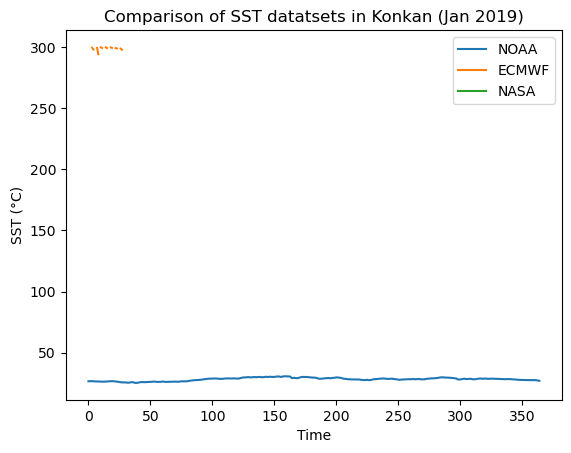

<xarray.DataArray 'sst' (time: 365, lat: 20, lon: 24)>
array([[[27.189999, 27.039999, ...,       nan,       nan],
        [27.06    , 27.06    , ...,       nan,       nan],
        ...,
        [26.42    , 26.18    , ...,       nan,       nan],
        [26.18    , 25.88    , ...,       nan,       nan]],

       [[27.24    , 27.14    , ...,       nan,       nan],
        [27.06    , 27.07    , ...,       nan,       nan],
        ...,
        [26.47    , 26.279999, ...,       nan,       nan],
        [26.24    , 25.939999, ...,       nan,       nan]],

       ...,

       [[28.109999, 28.41    , ...,       nan,       nan],
        [27.939999, 28.289999, ...,       nan,       nan],
        ...,
        [25.859999, 26.05    , ...,       nan,       nan],
        [25.84    , 26.      , ...,       nan,       nan]],

       [[27.849998, 28.119999, ...,       nan,       nan],
        [27.71    , 28.01    , ...,       nan,       nan],
        ...,
        [25.84    , 26.08    , ...,       nan,  

In [52]:
plt.figure()

#take the sst parameters
noaa_sst = noaa_konkan["sst"]  
ecmwf_sst = ecmwf_konkan["sea_surface_temperature"]
#ecmwf_sst = ecmwf_konkan["t2m"].isel(bnds=0)  # Select only the first bound
nasa_sst = nasa_konkan["analysed_sst"]  

# Compute mean over lat and lon
plt.plot(noaa_sst.mean(dim=["lat", "lon"]), label="NOAA")
plt.plot(ecmwf_sst.mean(dim=["lat", "lon"]), label="ECMWF")
plt.plot(nasa_sst.mean(dim=["lat", "lon"]), label="NASA")

plt.xlabel("Time")
plt.ylabel("SST (°C)")
plt.title("Comparison of SST datatsets in Konkan (Jan 2019)")
plt.legend()
plt.show()

print(noaa_sst)
print(ecmwf_sst)
print(nasa_sst)

 ### 2. Basic Statistics

In [32]:
print("NOAA SST Mean:", noaa_sst.mean().values) 
print("ECMWF SST Mean:", ecmwf_sst.mean().values) 
print("NASA SST Mean:", nasa_sst.mean().values) 
print("NOAA SST Std Dev:", noaa_sst.std().values) 
print("ECMWF SST Std Dev:", ecmwf_sst.std().values)
print("NASA SST Std Dev:", nasa_sst.std().values)

NOAA SST Mean: 28.207071
ECMWF SST Mean: 299.00027
NASA SST Mean: 300.00583
NOAA SST Std Dev: 1.553338885307312
ECMWF SST Std Dev: 1.5579324
NASA SST Std Dev: 1.1343261003494263


### 3.Correlation Analysis

In [35]:
sst_noaa_series = noaa_sst.mean(dim=['lat', 'lon']).to_pandas() 
sst_ecmwf_series = ecmwf_sst.mean(dim=['lat', 'lon']).to_pandas() 
sst_nasa_series = nasa_sst.mean(dim=['lat', 'lon']).to_pandas() 
correlation_matrix = pd.DataFrame({ "NOAA": sst_noaa_series, "ECMWF": sst_ecmwf_series, "NASA": sst_nasa_series }).corr() 
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
       NOAA  ECMWF  NASA
NOAA    1.0    NaN   NaN
ECMWF   NaN    1.0   NaN
NASA    NaN    NaN   NaN


# Model Testing

### A. Prepare Input Data for LSTM

In [36]:
sst_noaa_series.to_csv("sst_noaa_timeseries.csv")
sst_ecmwf_series.to_csv("sst_ecmwf_timeseries.csv") 
sst_nasa_series.to_csv("sst_nasa_timeseries.csv")

In [75]:
#ignore this cell . just for checking

a= pd.read_csv('sst_nasa_timeseries.csv')
#print(a)
print(a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    1 non-null      object 
 1   0       1 non-null      float64
dtypes: float64(1), object(1)
memory usage: 144.0+ bytes
None


In [46]:
#Evaluate RMSE, MAE, and correlation with ground truth data. ------- pause 


from sklearn.metrics import mean_absolute_error, mean_squared_error 
# RMSE calculation 
rmse_noaa = np.sqrt(mean_squared_error(ground_truth, sst_noaa_series))
rmse_ecmwf = np.sqrt(mean_squared_error(ground_truth, sst_ecmwf_series)) 
rmse_nasa = np.sqrt(mean_squared_error(ground_truth, sst_nasa_series)) 
print("RMSE NOAA:", rmse_noaa) 
print("RMSE ECMWF:", rmse_ecmwf) 
print("RMSE NASA:", rmse_nasa)

NameError: name 'ground_truth' is not defined

### Creating a Spatial Map (Heatmap) for a Specific Date

In [67]:
import cartopy.crs as ccrs

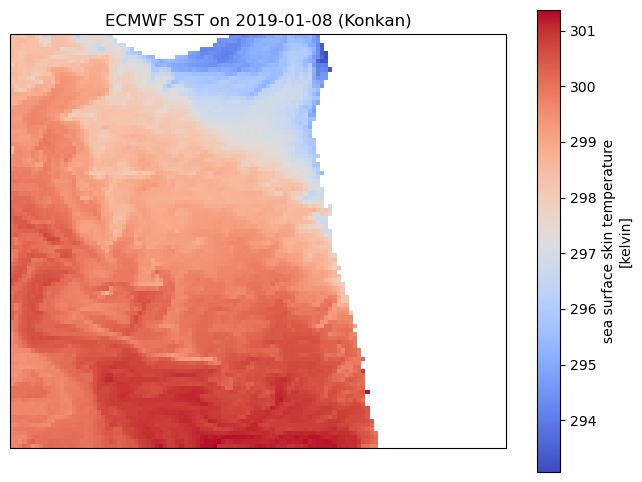

In [85]:
# Select the date: January 1, 2019 = "2019-01-01"
date = "2019-01-08" 
sst_day = ecmwf_sst.sel(time=date)
# Plot the SST for that day using a map
plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
sst_day.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="coolwarm") 
plt.title(f"ECMWF SST on {date} (Konkan)") 
plt.show()

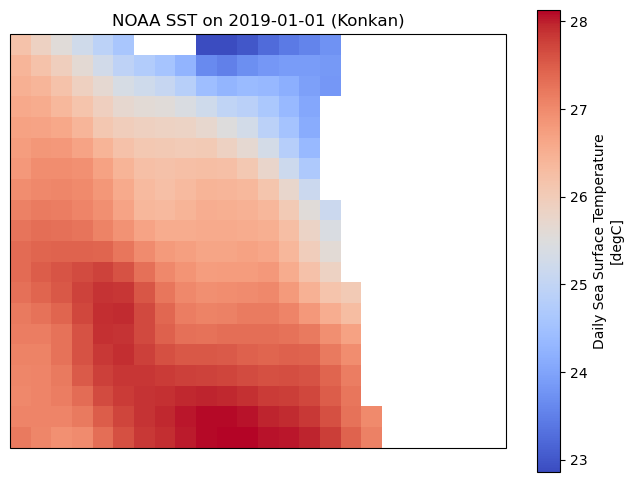

In [101]:
# Select the date: January 1, 2019 = "2019-01-01"
date = "2019-01-01" 
sst_day = noaa_sst.sel(time=date)
# Plot the SST for that day using a map
plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
sst_day.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="coolwarm") 
plt.title(f"NOAA SST on {date} (Konkan)") 
plt.show()

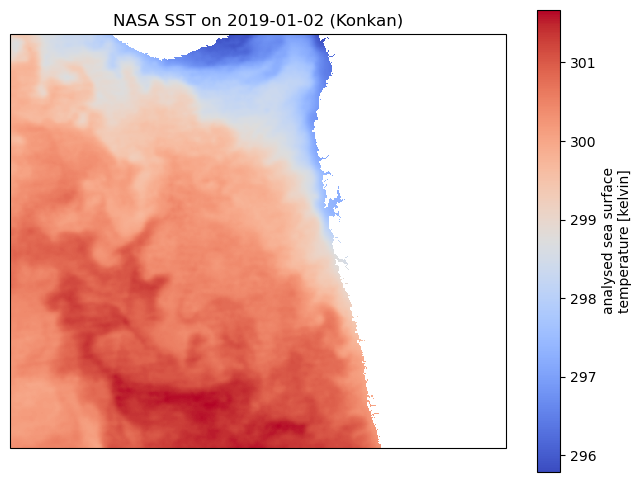

In [77]:
# Select the date: January 2, 2019 = "2019-01-01"
date = "2019-01-02" 
sst_day = nasa_sst.sel(time=date)
# Plot the SST for that day using a map
plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
sst_day.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="coolwarm") 
plt.title(f"NASA SST on {date} (Konkan)") 
plt.show()